In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook


### Objective

I am trying to compute the (non-smooth) objective of Eq 6,7,8,9 and 10 in the Du, Jin, Lee, Jordan and Singh paper. As a sanity check I plot it in 2D and compare to Eq 3. (which I assume is the same function???). Here is what Eq 3 looks like

![two_d](index.png)

<IPython.core.display.Javascript object>


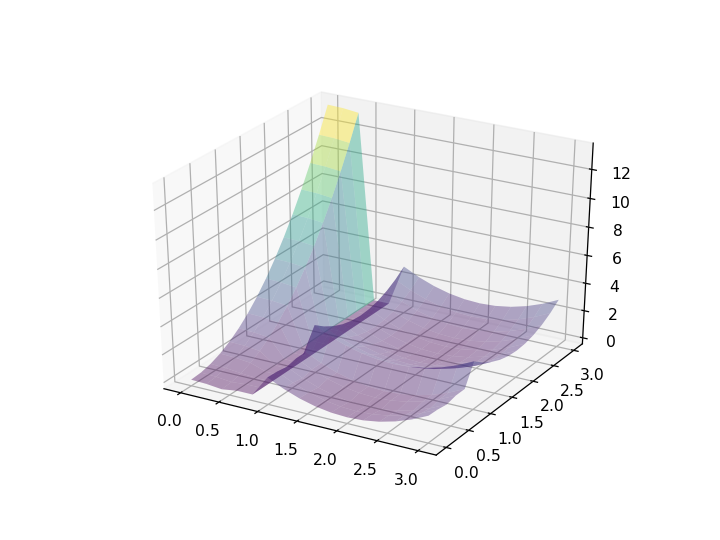

<IPython.core.display.Javascript object>


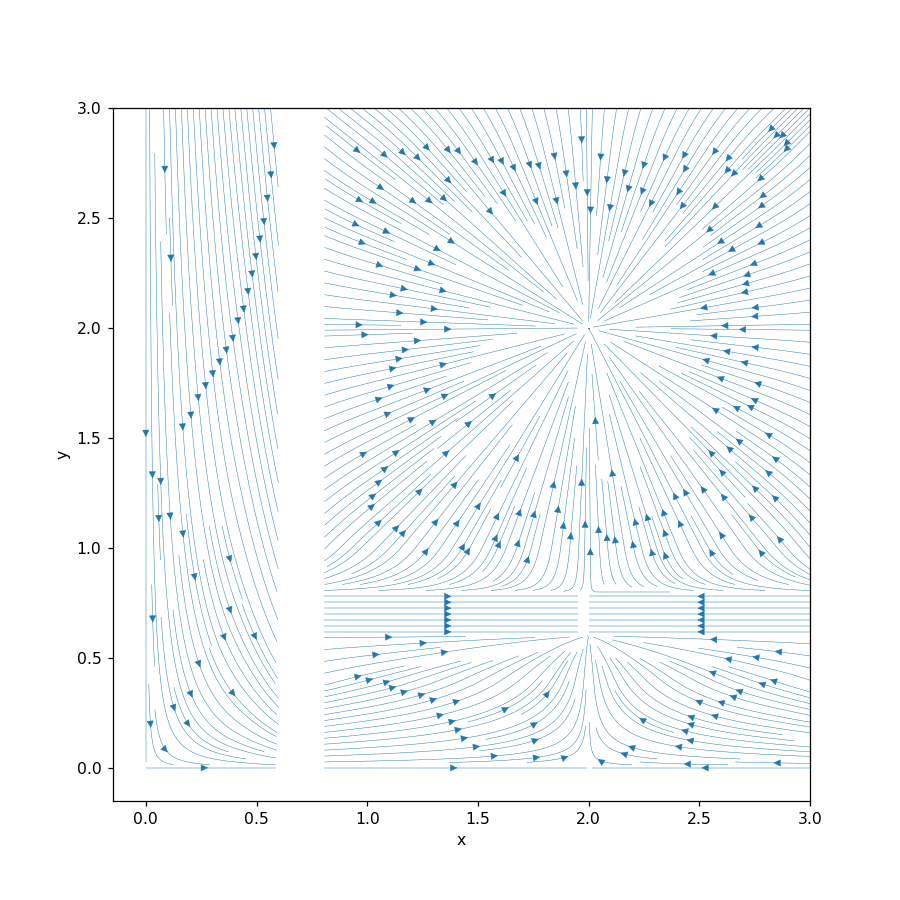

In [14]:
make_plot()

In [10]:
def compute_loss(w):
    d=w.shape[0]
    L=1.5
    gamma=1
    tau=1/2
    # We compute the loss based on where in the domain the current iterate is

    # a) around minimizer, i.e. w_i>2tau in all dimensions:
    if (w>= 2*tau).all()  and  (w<=6*tau).all():
        loss= np.dot(np.ones(d),L*(w-4*tau)**2)
    else:
    
    # b) find the first element in 0,...,d-1 that is lower than 2 tau
        index=np.argmax(w<2*tau,0)

        if index==0: #1. first dimension
            if w[index]>tau:
                if d<3:
                    loss=0
                else:
                    loss=np.dot(np.ones(d-index-1),L*w[index+2:d]**2) #throws error in 2d since index+2>d
            else:
                loss=-gamma*w[0]**2+np.dot(np.ones(d-1),L*w[1:d]**2)
        elif index==d-1: #2. last dimension
            if w[index]>tau:
                loss= np.dot(np.ones(d-1),L*(w[0:d-1]-4*tau)**2)        
            else:
                loss= np.dot(np.ones(d-1),L*(w[0:d-1]-4*tau)**2)-gamma*w[d-1]**2
        else: #c)3. all others
            if w[index]>tau:
                loss=np.dot(np.ones(index),L*(w[0:index]-4*tau)**2)+np.dot(np.ones(d-(index+2),L*w[index+2:d]**2))
            else:
                loss=np.dot(np.ones(index),L*(w[0:index]-4*tau)**2)-gamma*w[index]**2+np.dot(np.ones(d-(index+1),L*w[index+1:d]**2))       
    return loss

def compute_loss2(w):
    d=w.shape[0]
    L=1.5
    gamma=1
    tau=1/2
    # We compute the loss based on where in the domain the current iterate is

    # a) around minimizer, i.e. w_i>2tau in all dimensions:
    if (w>= 2*tau).all()  and  (w<=6*tau).all():
        loss= np.dot(np.ones(d),L*(w-4*tau)**2)
        loss=L*(w[0]-2)**2+L*(w[1]-2)**2


    else:
    
    # b) find the first element in 0,...,d-1 that is lower than 2 tau
        index=np.argmax(w<2*tau,0)

        if index==0: #1. first dimension
            if False:
                if d <3:
                    loss=0
                else:
                    loss=np.dot(np.ones(d-index-1),L*w[index+2:d]**2) #throws error in 2d since index+2>d
            else:
                loss=-gamma*w[0]**2+np.dot(np.ones(d-1),L*w[1:d]**2) #correct

        elif index==d-1: #2. last dimension
            if False:
                loss= np.dot(np.ones(d-1),L*(w[0:d-1]-4*tau)**2)        
            else:
                loss= np.dot(np.ones(d-1),L*(w[0:d-1]-4*tau)**2)-gamma*w[d-1]**2 #correct

        else: #c)3. all others
            if w[index]>tau:
                loss=np.dot(np.ones(index),L*(w[0:index]-4*tau)**2)+np.dot(np.ones(d-(index+2),L*w[index+2:d]**2))

            else:
                loss=np.dot(np.ones(index),L*(w[0:index]-4*tau)**2)-gamma*w[index]**2+np.dot(np.ones(d-(index+1),L*w[index+1:d]**2))       
                
    return loss

def compute_gradients(w):
    d=w.shape[0]
    L=1.5
    gamma=1
    tau=1/2
    # We compute the gradients based on where in the domain the current iterate is

    # a) around minimizer, i.e. w_i>2tau in all dimensions:
    if (w>= 2*tau).all()  and  (w<=6*tau).all():
        grad= 2*L*(w-4*tau)
    else:    
    
    # b) find the first element in 0,...,d-1 that is lower than 2 tau
        index=np.argmax(w<2*tau,0)

        if index==0: #1. first dimension
            if w[index]>tau:
                grad=np.zeros(d)
            else:
                grad=np.array([-2*gamma*w[index], 2*L*w[index+1:d]])

        elif index==d-1: #2. last dimension
            if w[index]>tau:
                grad=np.array([2*L*(w[0:d-1]-4*tau),0])
            else:
                grad=np.array([2*L*(w[0:d-1]-4*tau),-gamma*2*w[d-1]])
        else: #c)3. all others
            if w[index]>tau:
                grad=np.array([0,2*L*(w[0:index-1]-4*tau),2*L*w[index+2:d]])
            else:
                grad=np.array([-2*gamma*w[index],2*L*(w[0:index-1]-4*tau), 2*L*w[index+1:d]])
    return grad

def compute_gradients2(w):
    d=w.shape[0]
    L=1.5
    gamma=1
    tau=1/2
    # We compute the gradients based on where in the domain the current iterate is

    # a) around minimizer, i.e. w_i>2tau in all dimensions:
    if (w>= 2*tau).all()  and  (w<=6*tau).all():
        grad= 2*L*(w-4*tau)
    else:    
    
    # b) find the first element in 0,...,d-1 that is lower than 2 tau
        index=np.argmax(w<2*tau,0)

        if index==0: #1. first dimension
            if False:
                grad=np.zeros(d)
            else:
                grad=np.array([-2*gamma*w[index], 2*L*w[index+1:d]])
                #grad = np.array([-2*gamma*w[0], 2*L* w[1]])   

        elif index==d-1: #2. last dimension
            if False:
                grad=np.array([2*L*(w[0:d-1]-4*tau),0])
            else:
                grad=np.array([2*L*(w[0:d-1]-4*tau),-gamma*2*w[d-1]])

        else: #c)3. all others
            if w[index]>tau:
                grad=np.array([0,2*L*(w[0:index-1]-4*tau),2*L*w[index+2:d]])
            else:
                grad=np.array([-2*gamma*w[index],2*L*(w[0:index-1]-4*tau), 2*L*w[index+1:d]])
    return grad

In [13]:
def make_plot():      

    s=0.2
    x_ax = np.arange(0,3+s, s)  
    y_ax = np.arange(0,3+s, s)  
    x_ax,y_ax = np.meshgrid(x_ax,y_ax)
    loss=np.zeros((x_ax.shape[0],x_ax.shape[1]))
    gradient_x=np.zeros((x_ax.shape[0],x_ax.shape[1]))
    gradient_y=np.zeros((y_ax.shape[0],y_ax.shape[1]))

    for i in range(x_ax.shape[0]):
        for j in range(x_ax.shape[1]):
            loss[i,j]=compute_loss(np.array((x_ax[i,j],y_ax[i,j])))
            grad=compute_gradients(np.array((x_ax[i,j],y_ax[i,j])))
            gradient_x[i,j]=grad[0]
            gradient_y[i,j]=grad[1]

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_ax, y_ax, loss,cmap='viridis', 
                alpha=0.4,zorder=1)
    

    #1. Plot Gradient Flow
    plt.figure(2)

    plt.plot()
        
    plt.streamplot(x_ax,y_ax,-gradient_x,-gradient_y, density=4, linewidth='0.3')
    plt.gcf().set_size_inches((8,8))
    plt.show()
    plt.xlabel('x')
    plt.ylabel('y')